# Clustering on bidimensional vector data
Authors: Kevin Lagos & Andrés Navarro

# Parte 1

En esta primera parte de la tarea se estudiarán los algoritmos de Clustering K-means, Clustering jerárquico aglomerativo y DBSCAN, aplicados a 3 datasets de tipo vectorial. El objetivo es contrastar estos 3 algoritmos y determinar ventajas y desventajas frente a cada caso de estudio. Además, analizar el impacto de la elección de parámetros y medidas de proximidad. 

## 1.1 Dataset

Para esta primera parte se cuenta con 3 archivos:

1. <b>Spiral.txt</b> : $N=312, D=2$
2. <b>R15.txt</b> : $N=600, D=2$
3. <b>cute-t2-4k.txt</b> : $ N=4200, D=2$

Cada uno correspondiente a un dataset vectorial bidimensional, donde cada fila del archivo tiene el formato: $x_1$\t$x_2$. Siendo $x_1$ y $x_2$ los atributos de cada dato $X^{(i)}$ $\in \mathbf{R} ^{2}$ . 
Los datasets tienen una cantidad de puntos de 312, 600 y 4200 respectivamente.

In [ ]:
#Librerías 
import sklearn.cluster as skl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy
from ipywidgets import interact, interactive, fixed, interact_manual, Dropdown

from sklearn import cluster # Técnica de Clustering
from sklearn import datasets # Conjuntos de Datos Sinteticos
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics
import time   # Calculo de tiempos de ejecución
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
metrics_cluster = []

In [ ]:
#data_array: Función que devuelve un np.array de tamaño [n, D]
#Parámetros: file -> nombre del archivo 

#data_plot: Función que genera una gráfica del dataset 
#especificado en el parámetro file

def data_array(file):
    data = np.loadtxt(file)
    return data

def data_plot(file):
    data = data_array(file)
    plt.title("Dataset") 
    plt.xlabel("x_1") 
    plt.ylabel("x_2") 
    plt.plot(data[:,0], data[:,1],"ob", color="c") 
    plt.show() 

#Ejemplo de uso de la función interact 
interact(data_plot, file=["Spiral.txt","R15.txt","cure-t2-4k.txt"])

interactive(children=(Dropdown(description='file', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.data_plot>

## 1.2 K-Means (15 puntos)

1. Aplicar el algoritmo K-Means a cada uno de los datasets, utilizando distancia euclideana como medida de proximidad.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido y sus centroides.
3. Finalmente responder: 

    >a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    >b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

In [ ]:
#Implementación
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


In [ ]:
def getKMeans(n_cl, new_X):
  new_X = data_array(new_X)
  total_colores =  ["red", "blue", "green", "yellow", "black", "purple", "brown", "orange", "cyan", "pink", "grey", "violet", "turquoise", "tan", "darkgoldenrod", "lawngreen", "magenta" ]

  algoritmo = cluster.KMeans(n_clusters=n_cl)
  t0 = time.time()
  algoritmo.fit(new_X)
  t1 = time.time()
  tiempo_ajuste = t1 - t0

  
  labels = algoritmo.predict(new_X)
  
  C = algoritmo.cluster_centers_
  colores= total_colores[:n_cl]
  asignar=[]
  for row in labels:
      asignar.append(colores[row])

  y_pred = algoritmo.labels_.astype(np.int)
  labels = y_pred
  
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  plt.figure(figsize=(8,6))
  plt.scatter(new_X[:, 0], new_X[:, 1], c=asignar, s=70)
  centros = algoritmo.cluster_centers_
  plt.scatter(centros[:, 0], centros[:, 1], marker='*', s=1000, edgecolors = 'black', c= colores)
  plt.text(1, 0.5, 'Número de clusters: {0} \n Tiempo de ajuste: {1}\n Coeficiente de Silhouette: {2}'.format(n_clusters_, tiempo_ajuste, metrics.silhouette_score(new_X, labels)), fontsize=14, transform=plt.gcf().transFigure)
  plt.show()

  return tiempo_ajuste, algoritmo.inertia_ ,metrics.silhouette_score(new_X, labels)
  

R15.txt


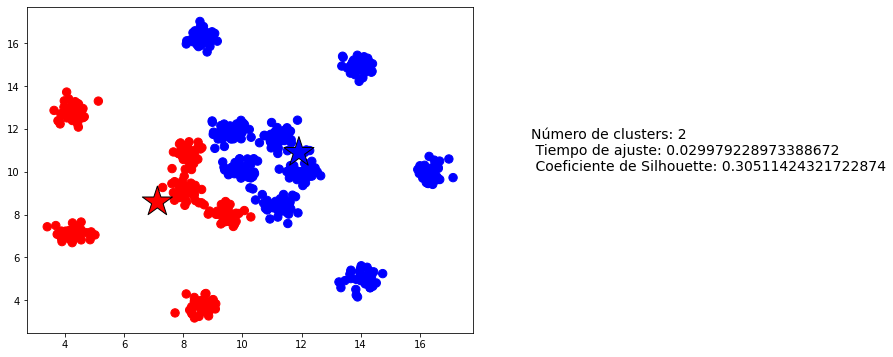

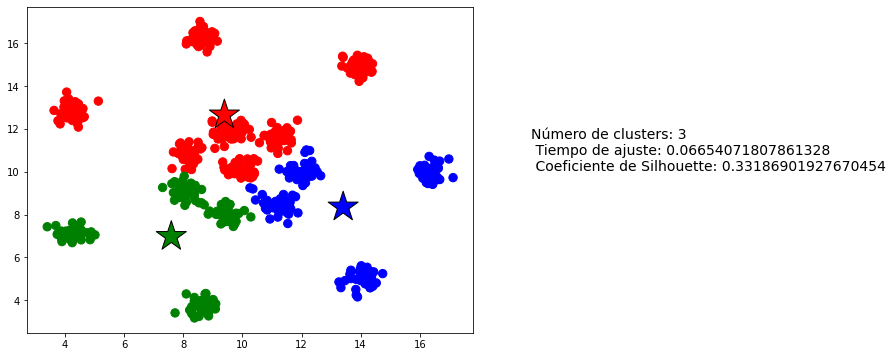

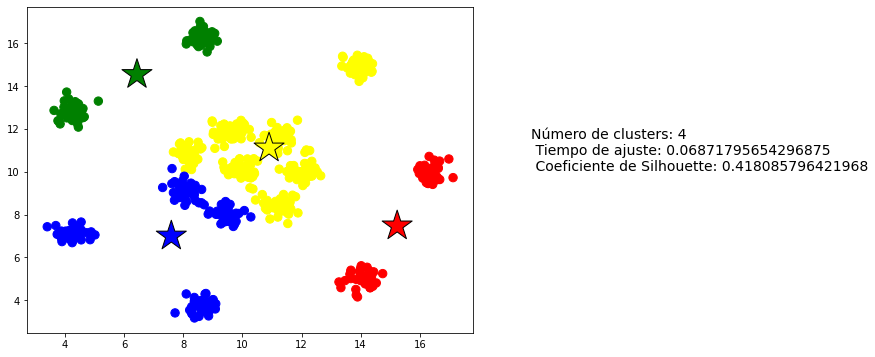

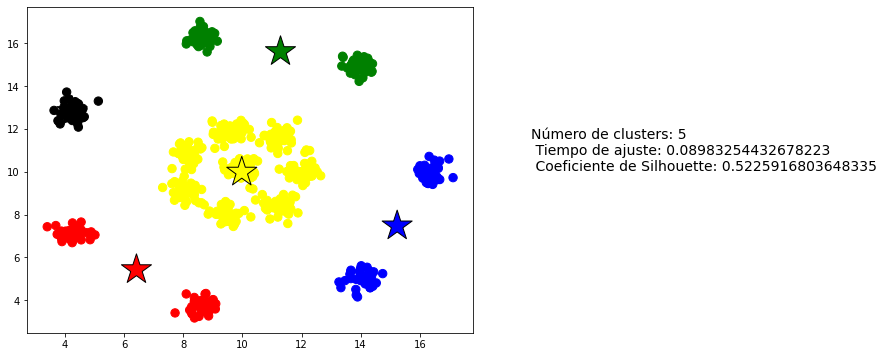

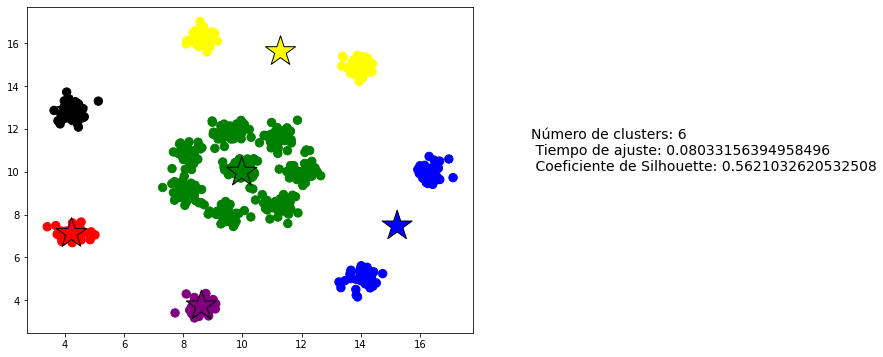

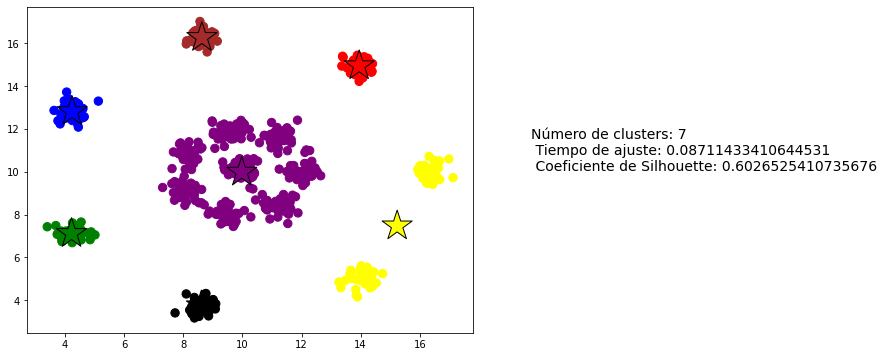

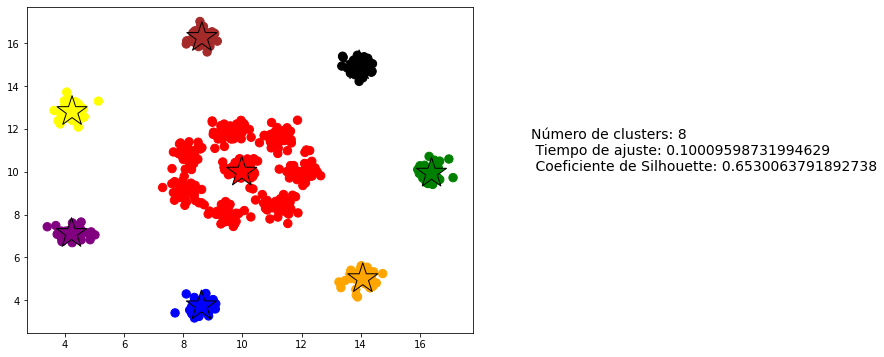

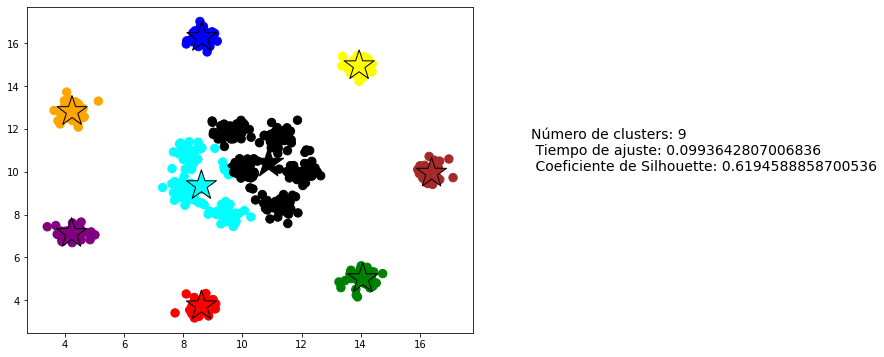

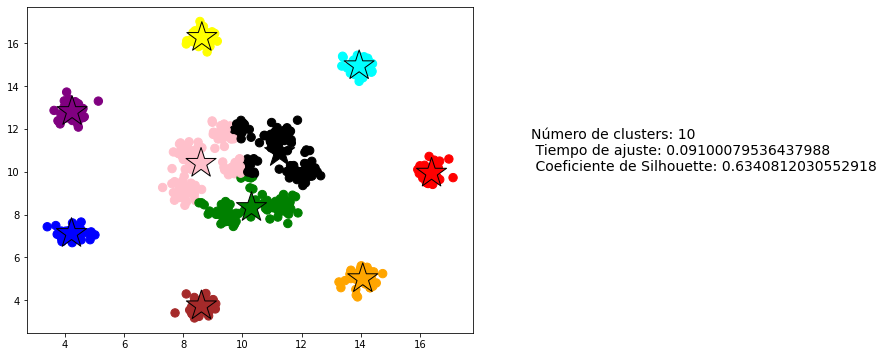

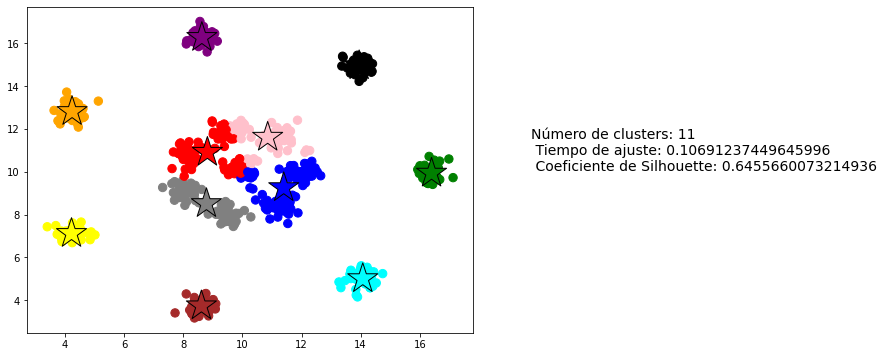

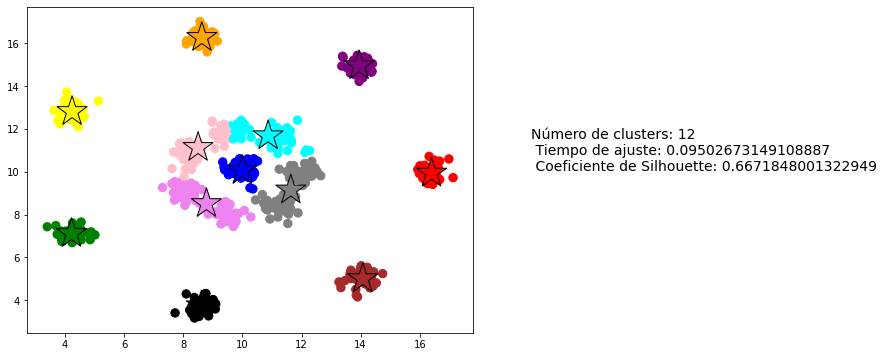

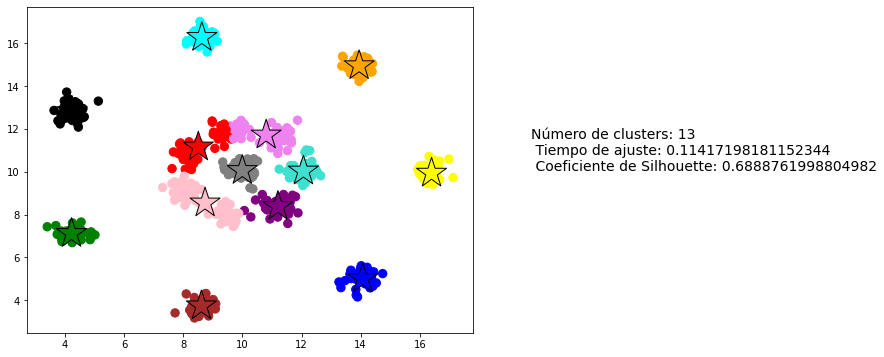

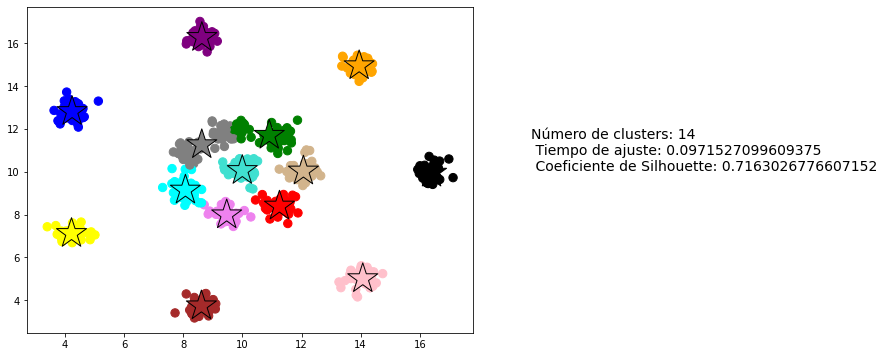

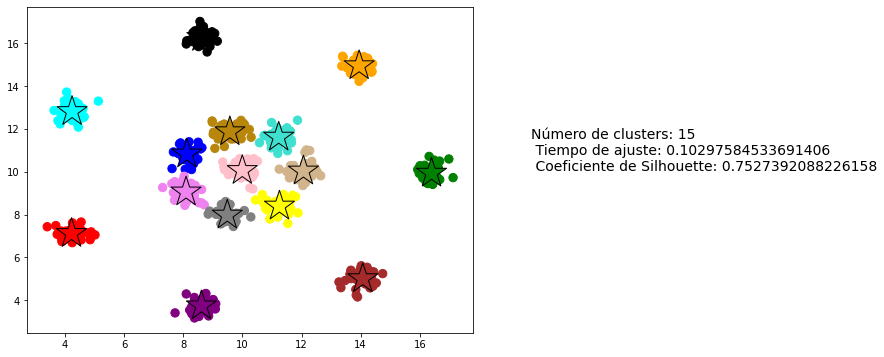

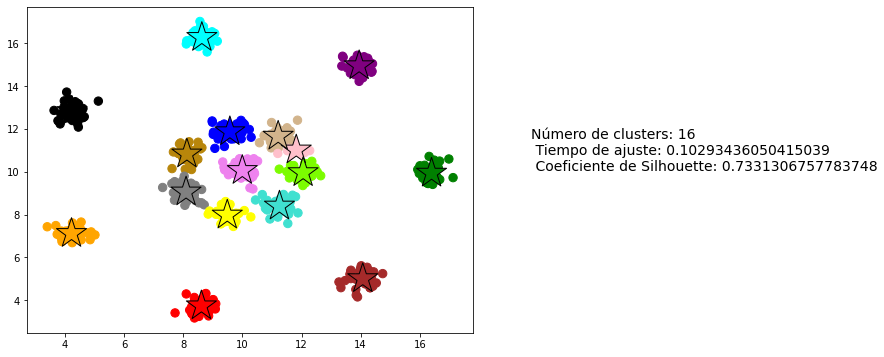

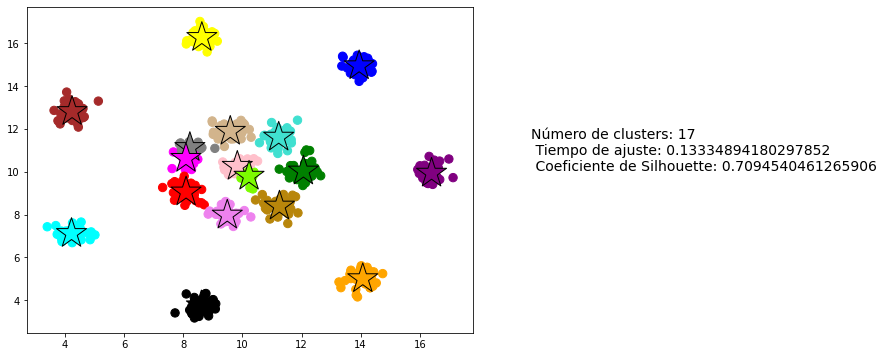

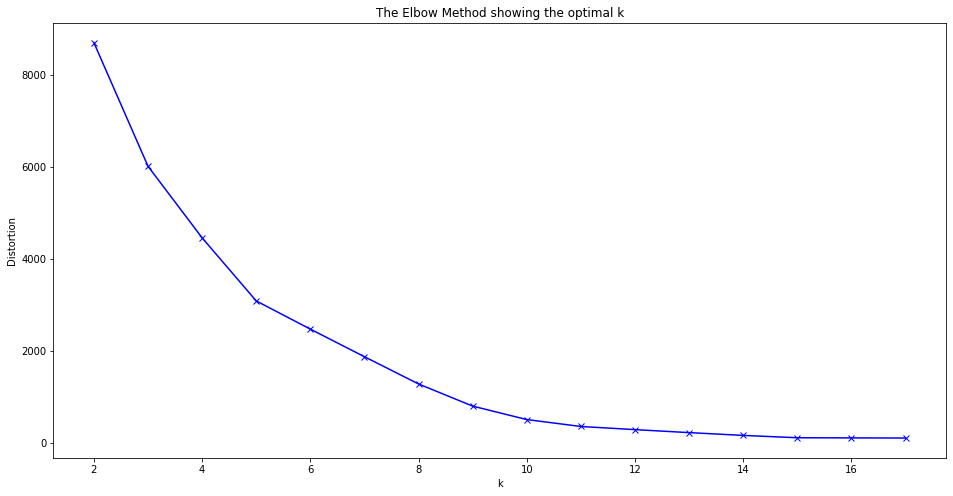

Best k - Silhouette coef. :  15
Spiral.txt


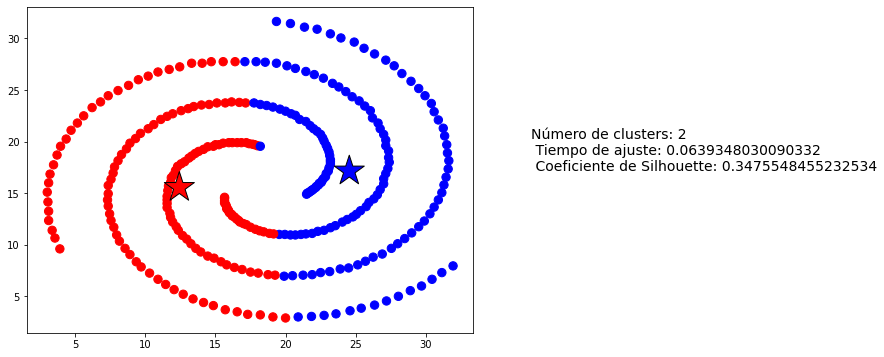

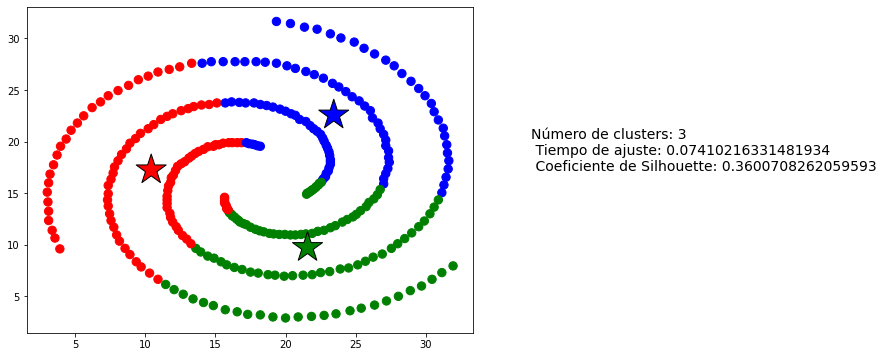

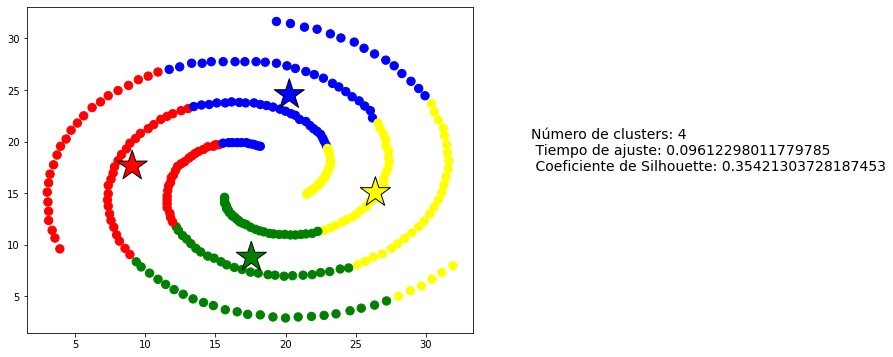

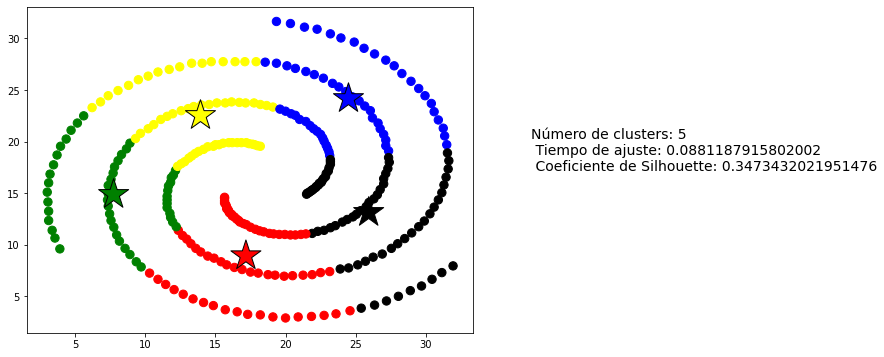

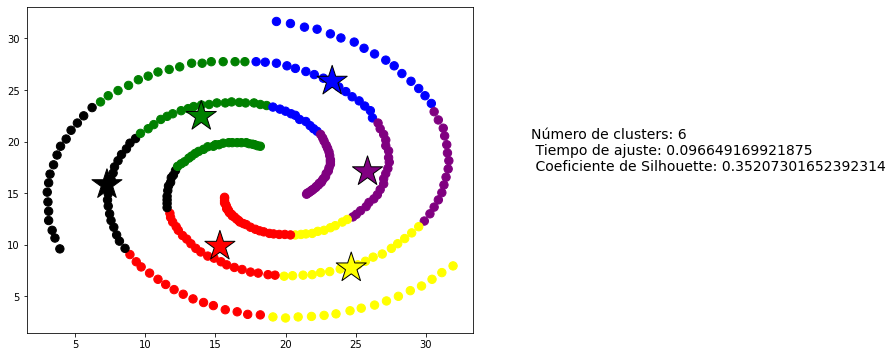

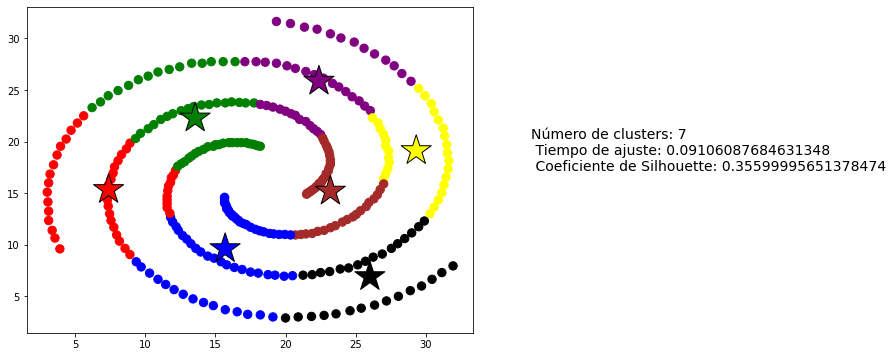

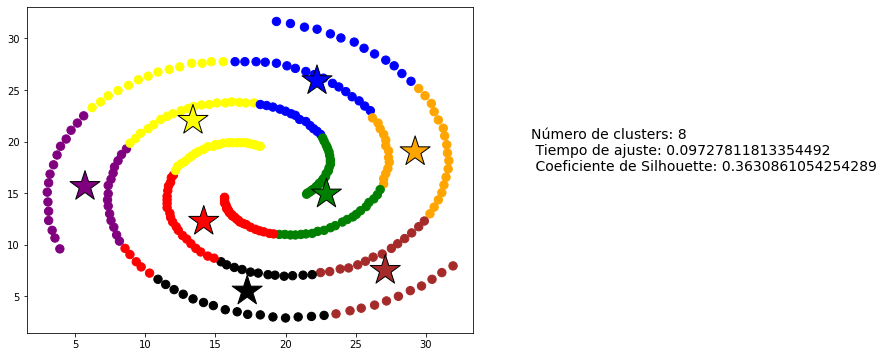

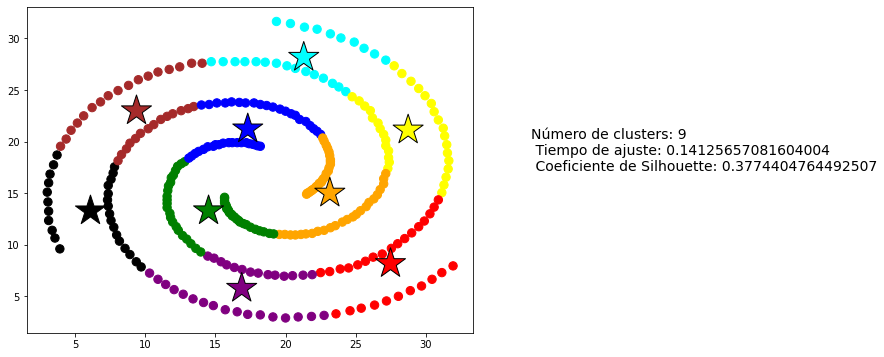

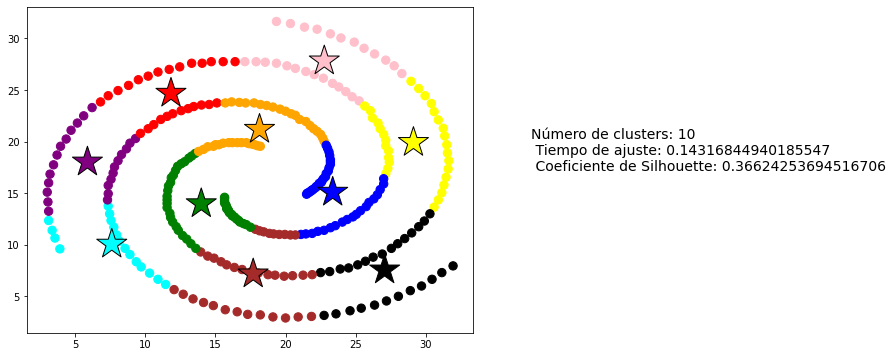

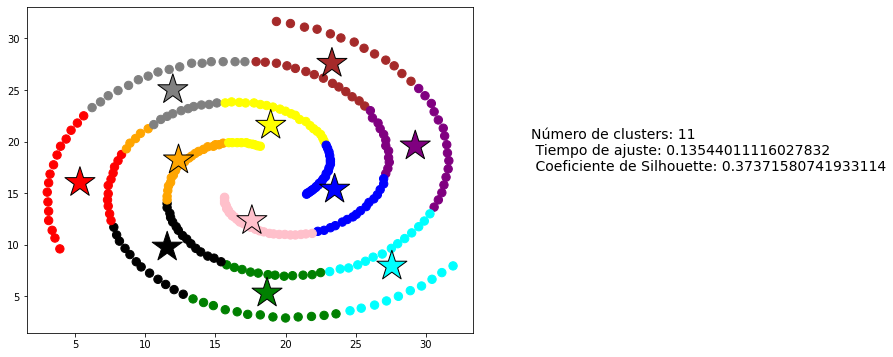

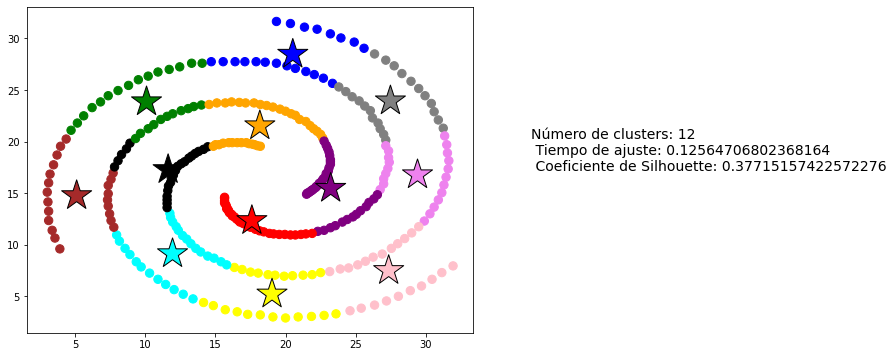

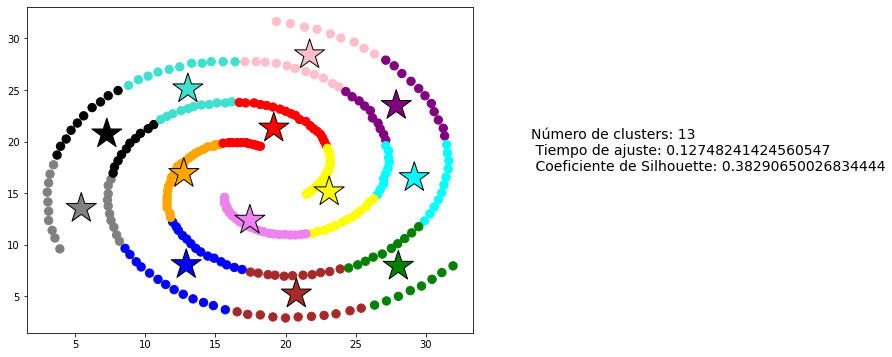

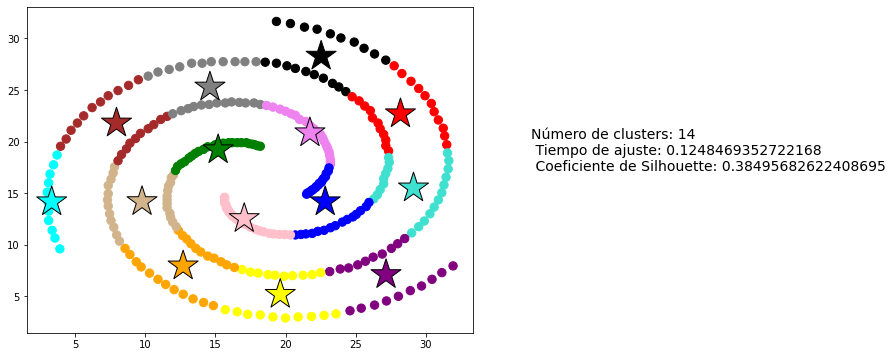

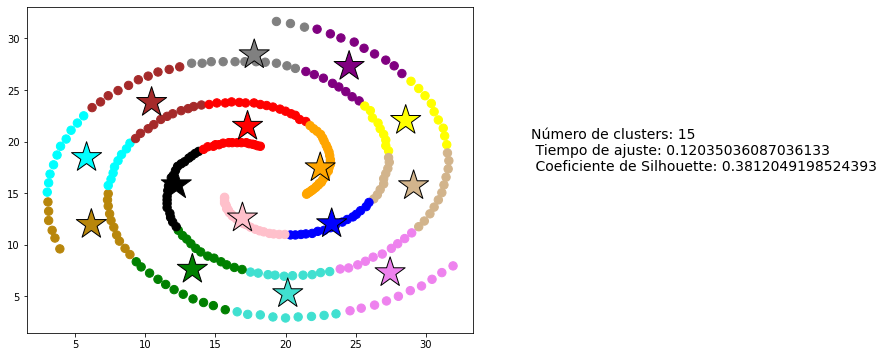

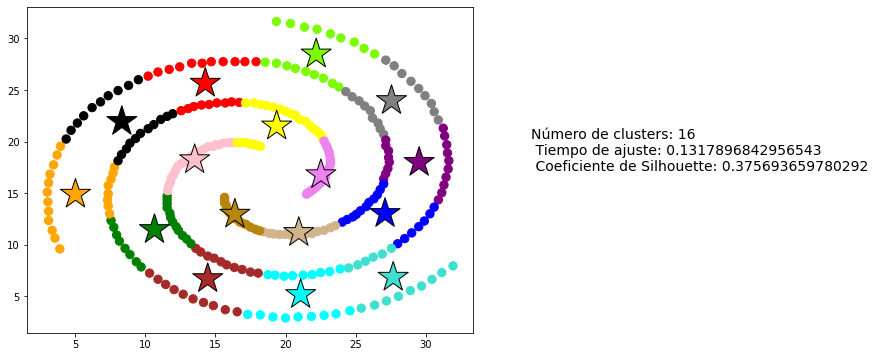

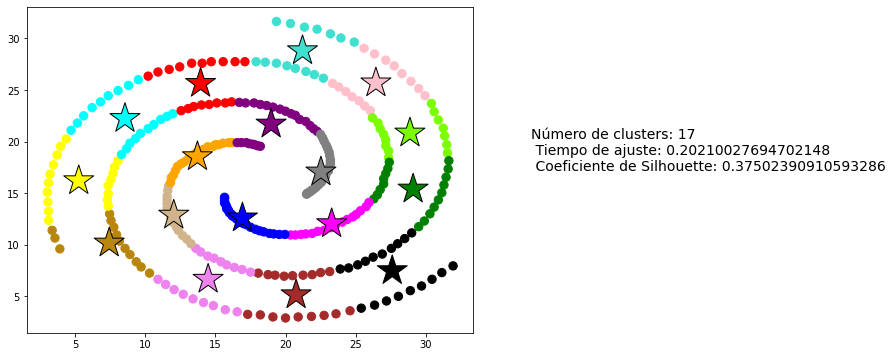

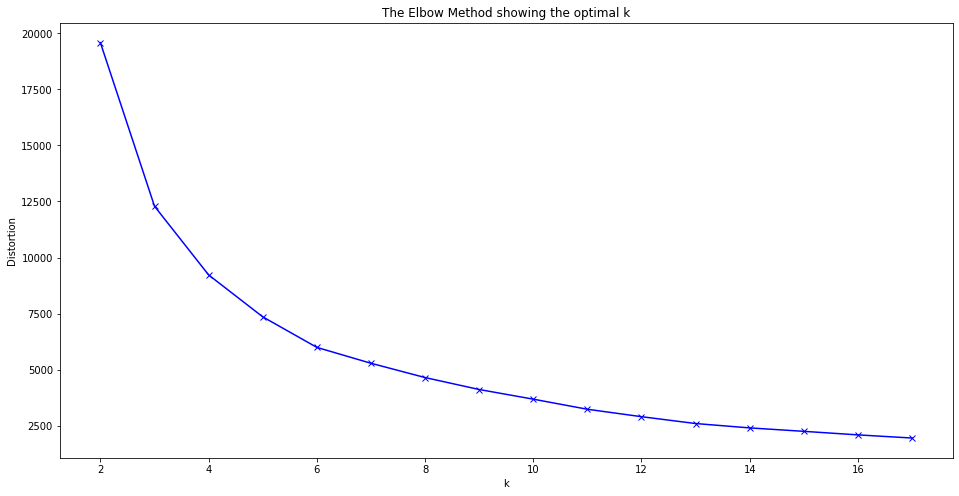

Best k - Silhouette coef. :  14
cure-t2-4k.txt


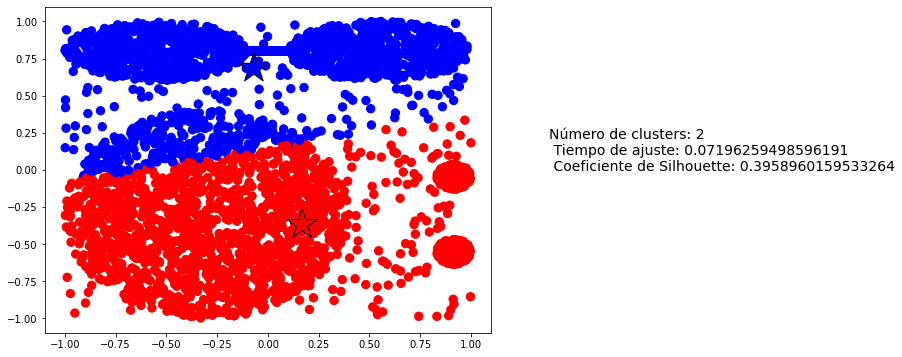

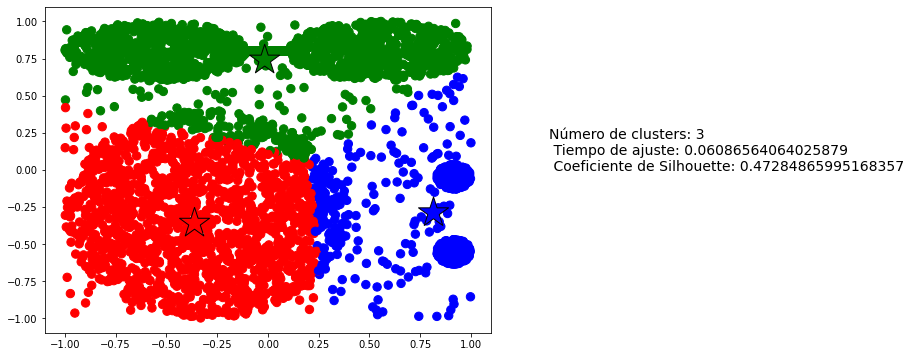

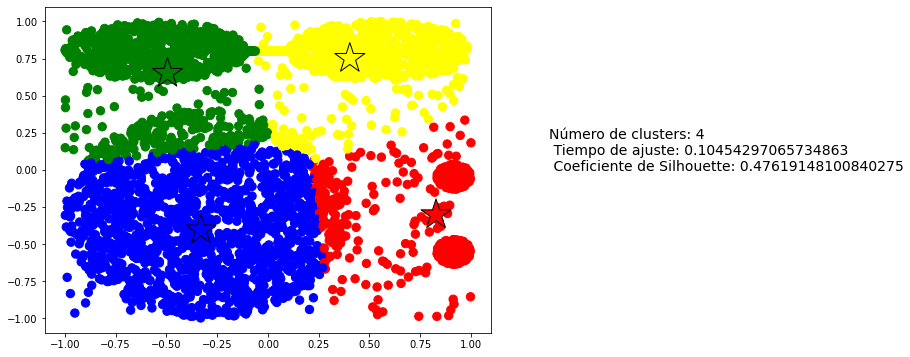

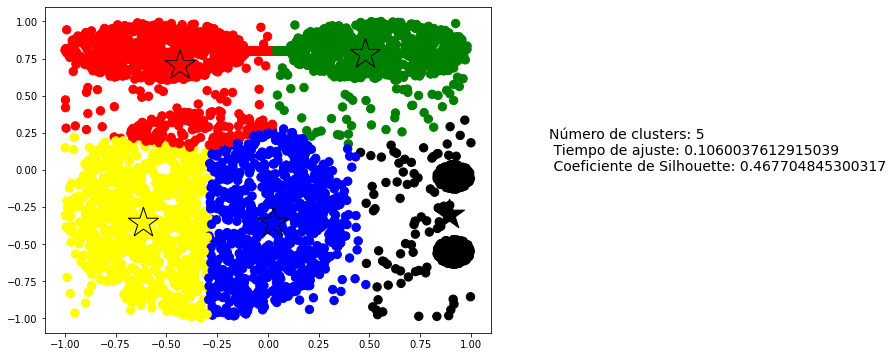

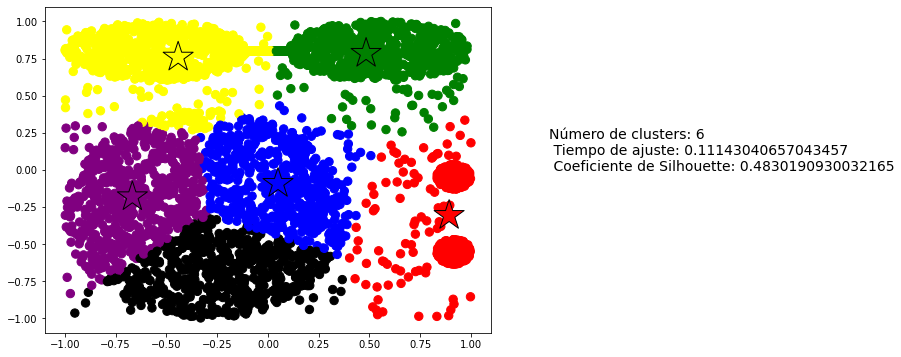

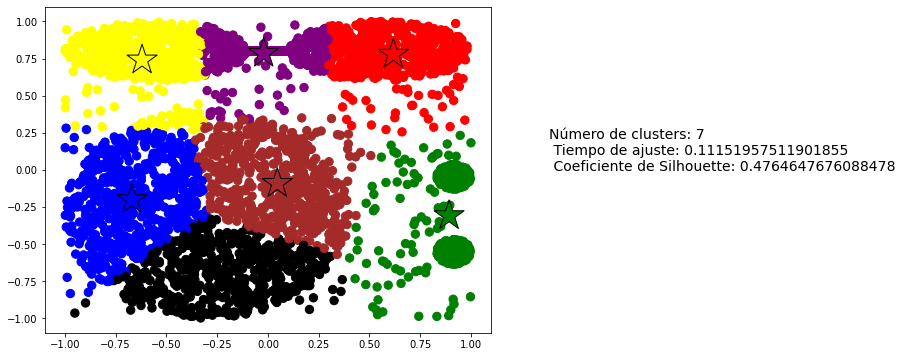

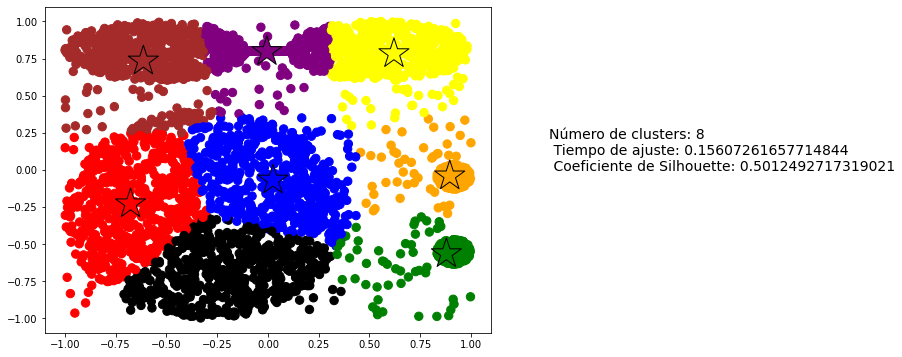

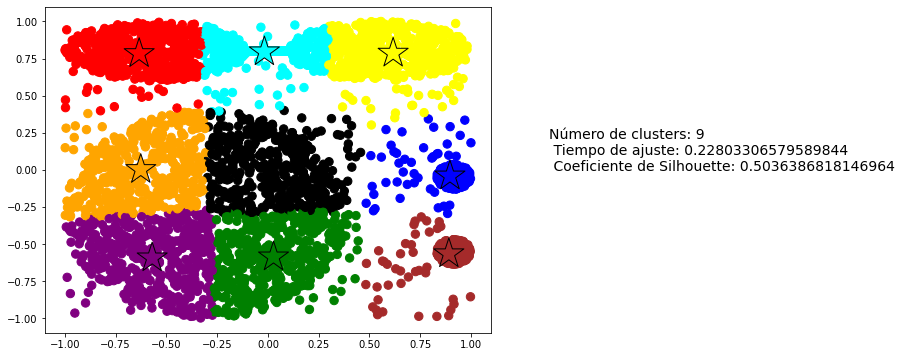

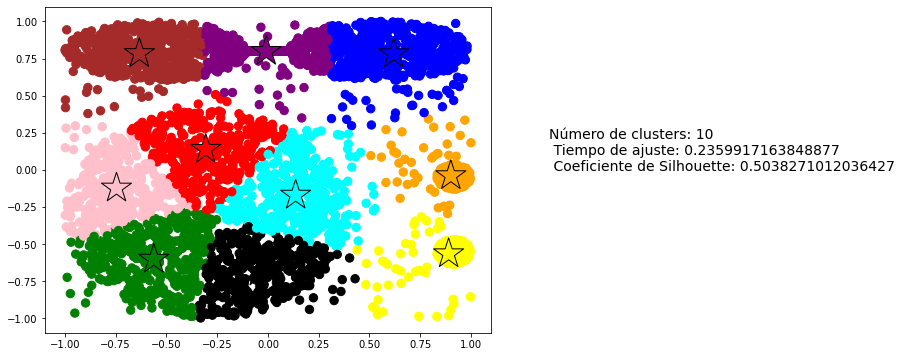

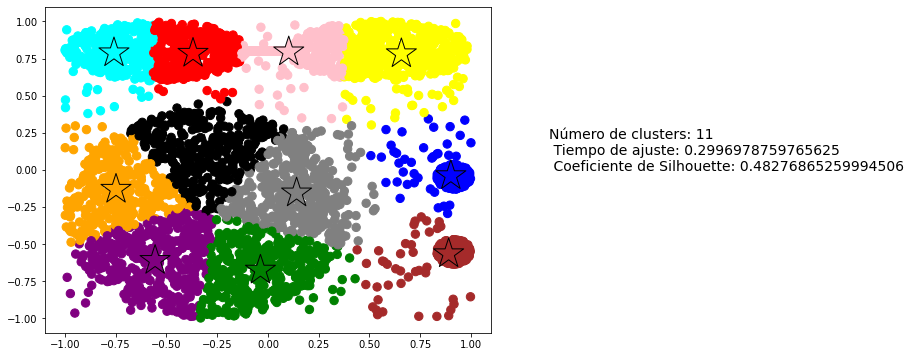

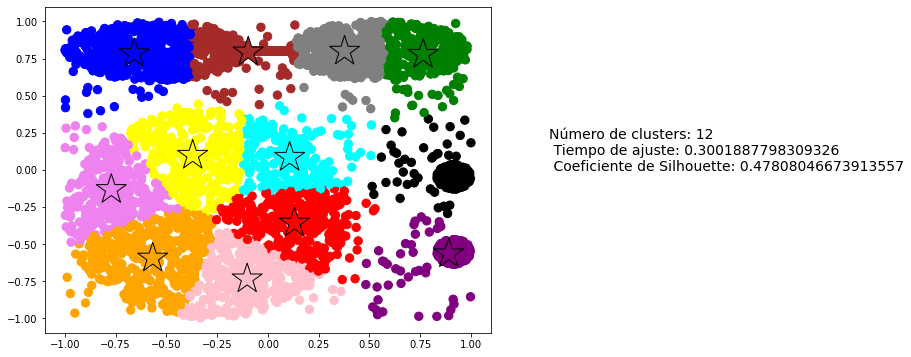

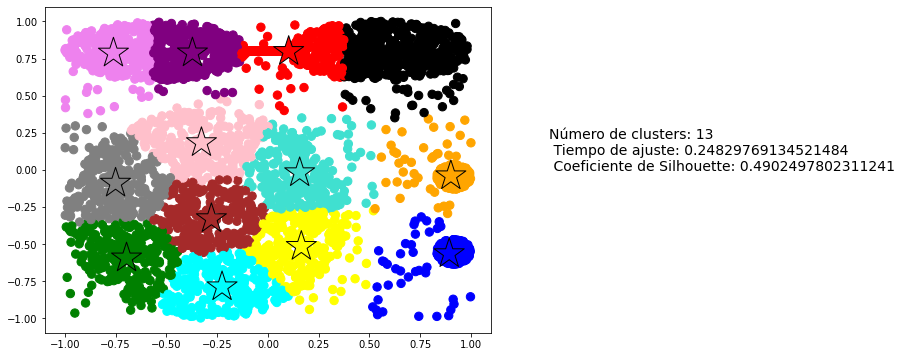

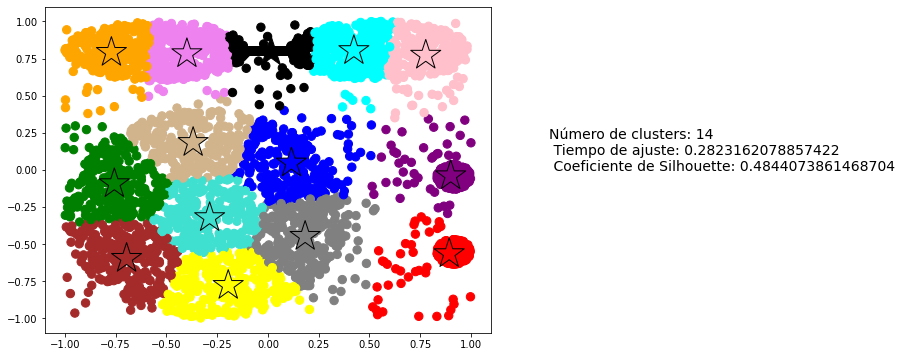

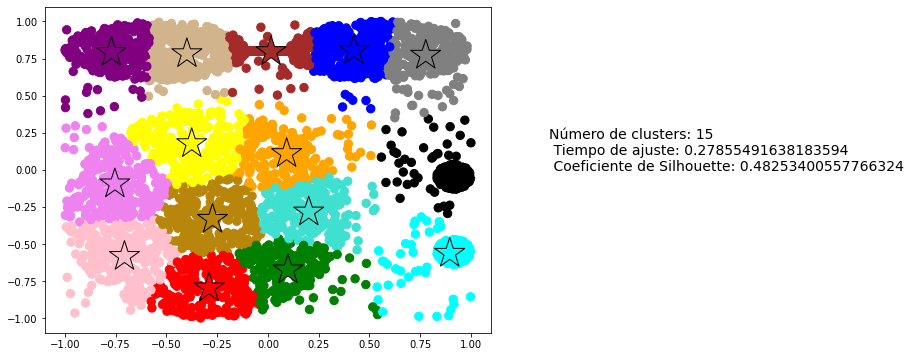

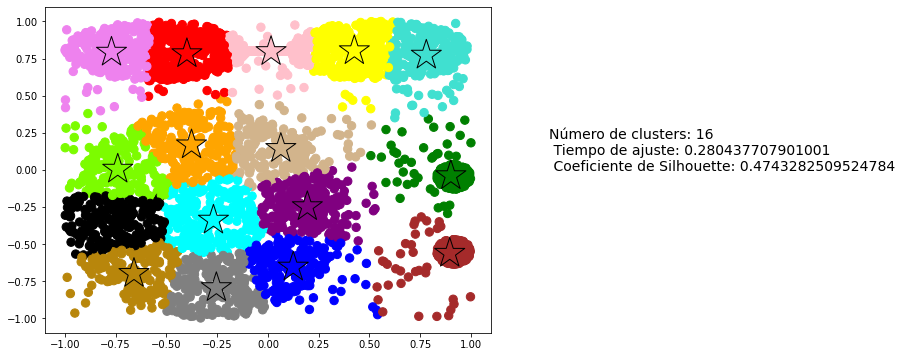

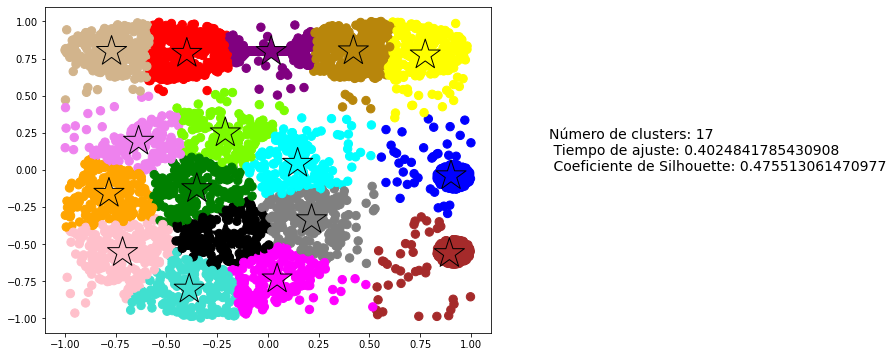

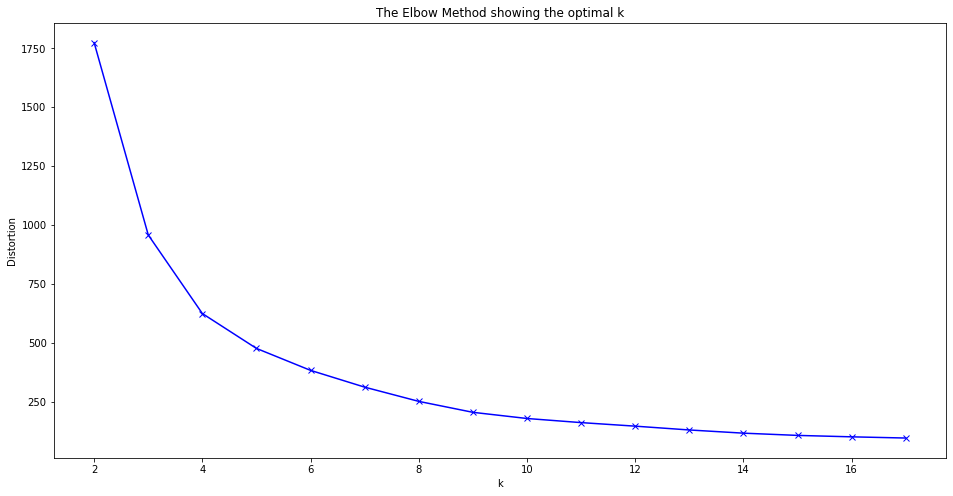

Best k - Silhouette coef. :  10


In [ ]:
new_Xs = ["R15.txt", "Spiral.txt", "cure-t2-4k.txt"]
Ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

results = []

for data_set in new_Xs:
  elbow_method = []
  silhouette_coef = []
  print(data_set)
  for k in Ks:
    tiempo, elbow, silhouette = getKMeans(k, data_set)
    results.append([data_set, k, tiempo, elbow, silhouette])
    elbow_method.append(elbow)
    silhouette_coef.append(silhouette)
  plt.figure(figsize=(16,8))
  plt.plot(Ks, elbow_method, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  print("Best k - Silhouette coef. : ", Ks[silhouette_coef.index(max(silhouette_coef))])




A continuación se puede ver un dataset con un determinado k de forma individual:

In [ ]:
interact(getKMeans, n_cl = Ks,  new_X=new_Xs )

interactive(children=(Dropdown(description='n_cl', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…

<function __main__.getKMeans>

### Preguntas:

a)  Se obtiene un mejor resultado para el dataset "R15" debido a que las comunidades que se presentan en este, a nivel visual presentan formas esféricas, con densidades y tamaños similares. Si bien con valores de k menores a las comunidades que se pueden distinguir visualmente, da como resultado que las comunidades que se encuentran cercanas en el centro, terminen por ser asignadas a un mismo cluster. Con k igual a 15 visualmente se logra identificar de buena manera los 15 cluster que existen.

Por otro lado, el dataset "Spiral" no se beneficia de este método debido a que K-means tiende a separar los clusters fragmentando las espirales y tomando porciones de estas en vez de tomar una misma espiral, ya que entre las distintas espirales existe una menor distancia que la del fin de una espiral a otra. Luego, al aumentar el valor de k, empieza a mejorar el coeficiente de Silhouette ya que los cluster sólo toman porciones de espirales cercanas entre sí.

En cuanto al dataset "cure-t2-4k", a pesar de presentar formas esféricas, dada la distribución de los puntos, existen muchos que estan dispersos, los que provocan que se formen clusters grandes que los incluyan y no se formen los clusters que corresponderían. Esto se puede ver cuando, para valores de K pequeños, no es capaz de identificar los dos clusters pequeños a la derecha, tomándolos cómo uno y dividiendo la gran comunidad izquierda en dos, dado que estos se encuentran muy cercanos entre sí. Al aumentar el número de clusters, tiende a fragmentar los clusters grandes que se pueden identificar visualmente, pero puede distinguir los clusters pequeños a la izquierda.

b) Los mejores resultados para cada dataset basados en el coeficiente de Silhouette fueron:
* R15:
  - K óptimo: 15
  - Coef. Silhouette: 0.753
  - K óptimo observando gráfico de Elbow: 12

* Spiral:
  - K óptimo: 14
  - Coef. Silhouette: 0.385
  - K óptimo observando gráfico de Elbow: 12

* cure-t2-4k:
  - K óptimo: 10
  - Coef. Silhouette: 0.504
  - K óptimo observando gráfico de Elbow: 10

Para determinar un valor óptimo para k se podría utilizar el coeficiente de Silhouette, que prueba ser una buena guía tanto para el primer como para el tercer dataset (para este último en menor medida), o bien a través de la gráfica de elbow, que, aunque sea menos precisa, nos puede dar indicio de en qué rango se podría encontrar el k óptimo.


## 1.3 DBSCAN (15 puntos)

1. Aplicar el algoritmo DBSCAN a cada uno de los datasets.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 
    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?
    
    > b. ¿Qué parámetros de Eps y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?  
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

In [ ]:
def getBestEps(new_X):
  #Considerando el 10% de los puntos como ruido
  new_X = data_array(new_X)
  min_pts = [2, 3, 4, 5, 6, 10]
  best_eps = []

  plt.rcParams["figure.figsize"] = [14,5]

  for num_neighbors in min_pts:
    neighbors = NearestNeighbors(n_neighbors=num_neighbors)
    neighbors_fit = neighbors.fit(new_X)
    distances, indices = neighbors_fit.kneighbors(new_X)
    distances = np.sort(distances, axis=0)
    #Distancia al k-vecino más cercano
    distances = distances[:,(num_neighbors-1)]
    best_eps.append(distances[int(round(len(new_X) * 0.9))])
    plt.subplot(2, 3, min_pts.index(num_neighbors)+1)
    plt.title('{0}-dist plot - Eps: {1}'.format(num_neighbors,  distances[int(round(len(new_X) * 0.9))]))
    plt.vlines(int(round(len(new_X) * 0.9)),0,distances[int(round(len(new_X) * 0.9))])
    plt.hlines(distances[int(round(len(new_X) * 0.9))],0,int(round(len(new_X) * 0.9)))
    plt.plot(distances)
  plt.tight_layout()
  plt.show()
  return best_eps

Dataset R15.txt : 600 puntos - 10% de puntos de ruido


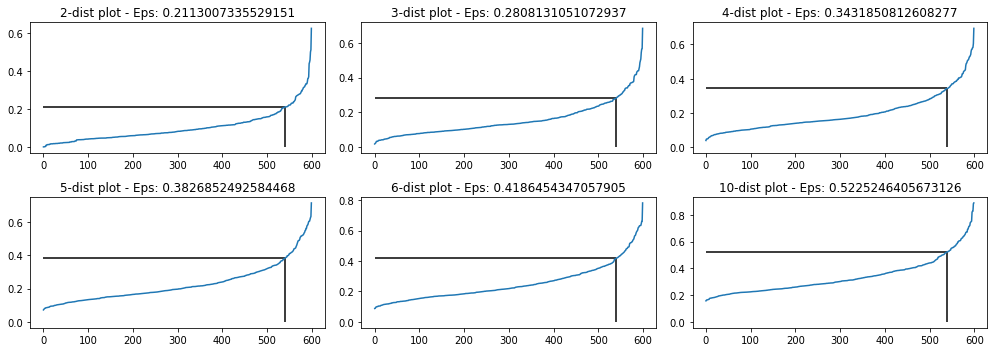

Dataset Spiral.txt : 312 puntos - 10% de puntos de ruido


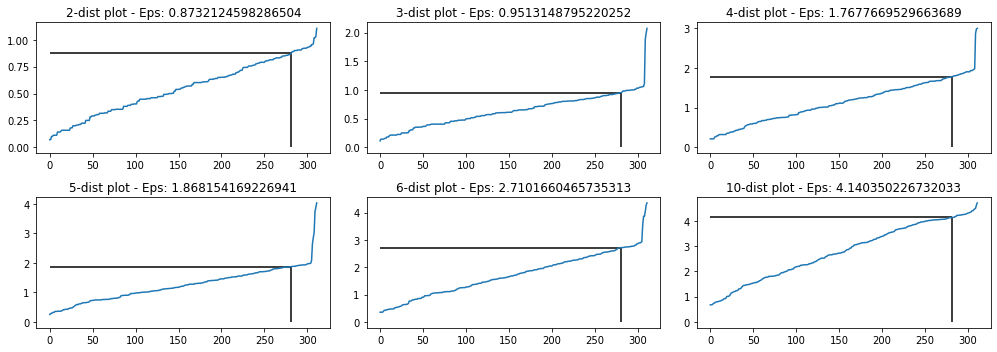

Dataset cure-t2-4k.txt : 4200 puntos - 10% de puntos de ruido


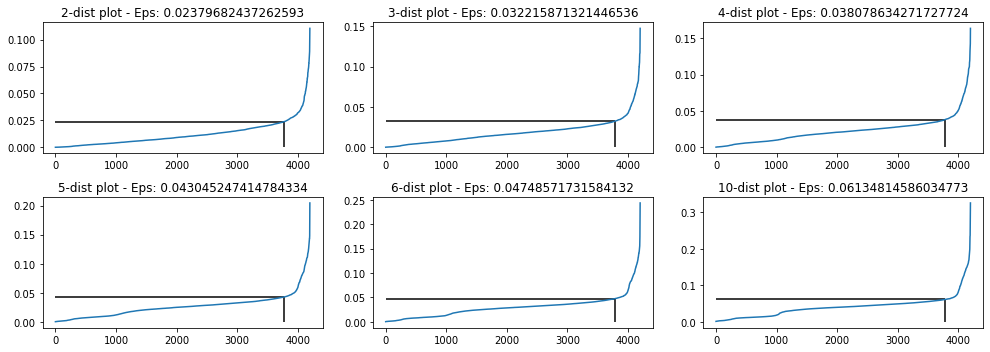

In [ ]:
datasets_best_eps = []

for dataset in new_Xs:
    print('Dataset {0} : {1} puntos - 10% de puntos de ruido'.format(dataset, len (data_array(dataset))))
    datasets_best_eps.append(getBestEps(dataset))

In [ ]:
#Implementación
def getDBSCAN(new_X_name, n_eps = 0.3):
  new_X = data_array(new_X_name)
  algoritmo = cluster.DBSCAN(n_eps)

  total_colores =  ["red", "blue", "green", "yellow", "pink", "purple", "brown", "orange", "cyan", "grey", "violet", "turquoise", "tan", "darkgoldenrod", "lawngreen", "magenta", "black"]

  t0 = time.time()
  algoritmo.fit(new_X)
  t1 = time.time()
  tiempo_ajuste = t1 - t0

  y_pred = algoritmo.labels_.astype(np.int)
  asignar=[]
  if (len(y_pred) > len(total_colores)):
    #Si hay más de 17 clusters
    asignar = colors[y_pred].tolist()
  else:
    for row in y_pred:
        asignar.append(total_colores[row])
      
  plt.scatter(new_X[:, 0], new_X[:, 1], color=asignar, s=70)
  n_noise = list(y_pred).count(-1)
  n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
  plt.text(1, 0.5, 'Dataset: {0}\nNúmero de clusters: {1}\nNúmero de puntos de ruido: {2} \nTiempo de ajuste: {3}\nCoeficiente de Silhouette: {4}'.format(new_X_name, n_clusters, n_noise, tiempo_ajuste, metrics.silhouette_score(new_X, y_pred)), fontsize=14, transform=plt.gcf().transFigure)

  return n_clusters, n_noise,metrics.silhouette_score(new_X, y_pred)
  


In [ ]:
# Función con opciones de Eps dependiendo de la distancia al k-vecino más
# cercano

interact(getDBSCAN, n_eps = datasets_best_eps[0] , new_X_name = fixed(new_Xs[0]))
interact(getDBSCAN, n_eps = datasets_best_eps[1] , new_X_name = fixed(new_Xs[1]))
interact(getDBSCAN, n_eps = datasets_best_eps[2] , new_X_name = fixed(new_Xs[2]))

interactive(children=(Dropdown(description='n_eps', options=(0.2113007335529151, 0.2808131051072937, 0.3431850…

interactive(children=(Dropdown(description='n_eps', options=(0.8732124598286504, 0.9513148795220252, 1.7677669…

interactive(children=(Dropdown(description='n_eps', options=(0.02379682437262593, 0.032215871321446536, 0.0380…

<function __main__.getDBSCAN>

In [ ]:
# Función con Eps libre.
# Se debe considerar que para ciertos valores de eps, dependiendo del dataset
# puede clasificar todos los puntos como ruido, o bien generar un solo cluster
# lo que da un error.
# Para cure-t2-4k da error con eps mayor a 0.17
# Para Spiral da error con eps menor a 0.25
# Para R15 da error con eps menor a 0.08 
# Al aumentar a mas de 0.18 el valor de eps para el dataset cure-t2-4k
interact(getDBSCAN, n_eps = (0.01, 3, 0.01) , new_X_name = new_Xs)

interactive(children=(Dropdown(description='new_X_name', options=('R15.txt', 'Spiral.txt', 'cure-t2-4k.txt'), …

<function __main__.getDBSCAN>

### Preguntas

a) Se comporta de buena manera para el dataset de "Spiral.txt", especificamente con un valor para **eps** cercano a 2, con este valor se puede ver que clasifica las 3 espirales como clusters distintos. Esto se debe a la forma en la que se incluye a un vecino a un cluster, incluyendolo si está a una distancia de **eps** de este, por lo que, al dar un valor grande, pero no lo suficiente para que sea capaz de incluir a un vecino de otra espiral, produce un resultado sin nodos catalogados como ruido.

Sin embargo, su desempeño para el dataset "cure-t2-4k.txt" no se queda atrás, ya que para un valor de **eps** entre 0.05 y 0.06 identifica correctamente los 5 clusters que se pueden identificar visualmente. No se debe olvidar que, con este valor, la cantidad de puntos considerados ruido corresponde a 173, lo que está bien, considerando que si dejamos el 10% de los puntos como ruido, se deberían dejar 420.

La que presenta peor desempeño corresponde a "R15.txt", ya que, si bien puede identificar la mayoría de los clusters externos, llega a considerar clustes ubicados en el centro como uno solo. Además, tiende a dejar un cluster externo como puntos de ruido.

b) Se considero la distancia al segundo, tercer, cuarto, quinto, sexto y décimo vecino más cercano para obtener seis valores de **eps**. Para cada dataset, los que entregaron un mejor valor fueron los siguientes:

* R15:
  - minPts: 4
  - eps: 0.343
  - Coef. Silhouette: 0.697

* Spiral:
  - minPts: 6
  - eps: 2.710
  - Coef. Silhouette: 0.001

* cure-t2-4k:
  - minPts: 6
  - eps: 0.047
  - Coef. Silhouette: 0.165

Adicional a esto se probó con distintos valores por medio de un slider para **eps**, teniendo como guía los valores obtenidos con minPts:

* R15: 0.39
* Spiral: 2
* cure-t2-4k: 0.05 - 0.06

Estos resultados son apoyados (además de visualmente) por el coeficiente de Silhouette, que, a pesar de dar menores resultados comparado con K-means (lo que es esperado debido a dejar puntos como ruido), presentan valores de esta métrica mayores a los de otros **eps**, siendo más cercanos a 1.

Para escoger estos parámetros primero debemos decidir la cantidad de puntos de ruido que queremos obtener dado un minPts. Luego se podría probar un rango de posibilidades para los minPts y construir el gráfico de las distancias al k-vecino más cercano, para decidir el valor de **eps** y a partir de estas posibilidades poder decidir en base a la cantidad de noise points y el coeficiente de Silhouette.

Opcionalmente se podría decidir el valor de **eps** en base a la curvatura del gráfico de distancias al k-vecino más cercano.


## 1.4 Hierarchical Agglomerative Clustering  (15 puntos)

1. Aplicar el algoritmo HAC a cada uno de los datasets, utilizando tanto single link como complete link. Puede escoger la cantidad de cluster que estime conveniente. 
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 

    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    > b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?  
    

In [ ]:
#Implementación

def getHAC(n_cl, link_type, new_X):
  new_X = data_array(new_X)
  algoritmo = cluster.AgglomerativeClustering(linkage=link_type, 
                                              affinity="euclidean", 
                                              n_clusters=n_cl)
  total_colores =  ["red", "blue", "green", "yellow", "black", "purple", "brown", "orange", "cyan", "pink", "grey", "violet", "turquoise", "tan", "darkgoldenrod", "lawngreen", "magenta" ]
  
  t0 = time.time()
  algoritmo.fit(new_X)
  t1 = time.time()
  tiempo_ajuste = t1 - t0

  y_pred = algoritmo.labels_.astype(np.int)
  asignar=[]
  for row in y_pred:
      asignar.append(total_colores[row])
  plt.scatter(new_X[:, 0], new_X[:, 1], color=asignar, s=70)

  labels = y_pred
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

  print('Estimated number of clusters: %d' % n_clusters_)
  print("Silhouette Coefficient: %0.6f"
        % metrics.silhouette_score(new_X, labels))
  return tiempo_ajuste, metrics.silhouette_score(new_X, labels)


In [ ]:
new_Xs = ["R15.txt", "Spiral.txt", "cure-t2-4k.txt"]
Ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
link_types = ["single", "complete"]

interact(getHAC, n_cl = Ks, link_type = link_types, new_X = new_Xs)

interactive(children=(Dropdown(description='n_cl', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…

<function __main__.getHAC>

### Preguntas

a) Este método genera buenos resultados tanto para el dataset "R15.txt" cómo para "Spiral.txt". Para el primero, la mejor configuración se obtiene dándole como parámetros 15 clusters y complete linkage, lo que viene dado a que este dataset presenta ciertas "pequeñas islas" alrededor de algunos clusters externos, lo que al ocupar single linkage, da como resultado que estos clasificados como clusters individuales, y los clusters centrales se unan al estar más cerca entre sí que estas "pequeñas islas" a los clusters externos. Separa correctamente los 15 clusters y sólo tiene un problema con ciertos puntos que se encuentran entre 2 clusters y se clasifican en un tercero (de color rojo), teniendo un coeficiente de Silhouette de aproximadamente 0.74. 

  Para el segundo dataset la configuración óptima fue con 3 clusters y con single linkage, lo que es correcto, ya que con esta configuración los clusters se unen en base a los nodos más cercanos entre ellos, aglomerando de esta forma los clusters de una misma espiral, en caso de dar más clusters, se fraccionan en partes de alguna espiral. De esta manera se pudieron clasificar correctamente los puntos para cada espiral. Se destaca el hecho de que al seleccionar complete linkage, se comportaba similar a K-means.

  El con peor rendimiento corresponde a "cure-t2-4k". Al utilizar single linkage resulta en uno, dos o tres grandes clusters que consideran a los clusters visibles y el número de cluster restantes los asigna a pequeñas concentraciones de puntos que se encuentran alrededor de estos. Lo anterior puede estar dado a que al considerar como parámetro para unir dos clusters la distancia entre sus nodos más cercanos, los clusters grandes terminan "absorviendo" a los demás al ir incluyendo puntos que no son claramente de un cluster u otro, extendiéndose más de lo que deberían. Con complete linkage se presenta un comportamiento similar al observado utilizando K-means.

b) Para el dataset Spiral se obtiene un mejor resultado, dado que al usar single-linkage, los clusters se unen en base al nodo mas cercano entre estos, por lo que, inicialmente estos se unirán a un nodo de la misma espiral, y a medida que se vayan aglomerando los clusters, debido a la disposición de los nodos, preferirán unirse a los clusters de una misma espiral, ya que sus nodos más cercanos siempre estarán más cerca.


## 1.5 Conclusiones

> a. ¿Qué algoritmo entregó un mejor resultado para cada dataset? Compare las ventajas y desventajas de cada algoritmo utilizado en relación a las características de los clusters de cada dataset y concluya. Para esta comparación, básese en los resultados para los mejores valores de k, Eps y minPts obtenidos. 

 > * R15: K-means tiene un buen desempeño para este dataset dado la forma globular de los clusters, además de poseer un tamaño y densidad similares, por lo que le es fácil poder identificar los clusters si se le da un k cercano al óptimo para este caso (15), identificando correctamente los que se encuentran en el exterior cuando el k dado es suficiente y dejando el resto de clusters para el grupo central. También el coeficiente de Silhouette es un buen indicador para poder identificar el mejor k para este dataset.

 > * Spiral: DBSCAN presenta un buen desempeño dada la forma que poseen los clusters de este dataset, ya que al dar un radio lo suficientemente grande permite que puedan identificar los nodos de una misma espiral entre sí, ya que se "extiende" este radio para continuar la cadena (por decirlo de alguna manera), pero no lo suficiente como para que un nodo de otra espiral llegue a ser incluido en el radio de los nodos de otro cluster. En este caso el valor de minPts elegido fue 5, ya que en ciertas partes de las espirales los nodos se encuentran un poco más separados, produciendo un **eps** que no produce puntos de ruidos y clasifica todos los nodos en una espiral. Al elegir minPts como 6, el valor de **eps** provoca que las partes más distantes de una espiral queden fuera

 > * cure-t2-4k: DBSCAN es el algoritmo que presenta un mejor desempeño en este cluster dada la capacidad que tiene de dejar nodos fuera de los clusters, clasificándolos como ruido, los que se pueden diferenciar claramente de forma visual de los 5 clusters. Sin embargo, debido al conjunto de nodos que se encuentra entre los dos clusters superiores, que hace de "puente" entre estos, los clasifica como un sólo cluster. Sin embargo, se destaca el hecho de que no fragmenta el gran cluster en otros más pequeños. Si se considera como buena la clasificación de los dos clusters superiores cómo uno solo se tiene que un buen resultado que excluye a los nodos que se podrían considerar como ruido y sólo presenta un pequeño cluster que debería ser parte del cluster más grande.

 > K-means es un algoritmo confiable cuando los clusters poseen una estructura globular y no existe una diferencia significativa entre sus tamaños y densidades. También, dado al tipo de clusters que forma, el coeficiente de Silhouette es una buena métrica identificar si los identificó de una buena manera. La desventaja de este algoritmo es, en primera instancia, tener que elegir el k. Luego este algoritmo tiene dificultades para poder identificar clusteres con formas más complejas que un círculo y el hecho de que se presenten nodos que no estén claramente en un cluster (ruido).

 > DBSCAN posee la fortaleza de poder dejar nodos sin clasificar en cluster, lo que favorece el priorizar la clasificación de nodos que claramente se encuentren en un cluster de otros. Además, por cómo se construyen los clusters, este puede ser capaz de detectar los que poseen una forma irregular y se destaca el hecho que no se le tiene que dar un número de clusters definido, ya que este los encuentra en base a **eps**. A pesar de no tener que elegir el k, este posee la desventaja de tener que establecer el valor de **eps**, lo que puede llegar a ser problemático, sin embargo, la estrategia de graficar la distancia al k-vecino más cercano y definir un porcentaje de nodos de ruido puede dar una buena estimación al valor de **eps** que produce el número de clusters ideal. En los experimentos anteriores se evidenció que valores entre cercanos a 5 producen buenos resultados. También se debe considerar el hecho de que dejar nodos sin clasificar, a pesar de ser una ventaja, puede afectar de forma negativa a métricas como el coeficiente de Silhouette.

 > HAC posee la ventaja de poder elegir el tipo de link. Esto otorga versatilidad a este algoritmo, ya que, dependiendo del que elijas se puede obtener uno u otro resultado, como se pudo ver en las preguntas anteriores, favoreciendo la formación de estructuras más uniformes (globulares) al elegir complete-link y de formas más irregulares al elegir single-link. La desventaja de este algoritmo es tener que elegir el k y tipo de link, lo que podría llegar a ser un problema si es que no se tiene alguna hipótesis del valor de k y de la estructura de los clusters.

 > Además, se debe destacar que el coeficiente de Silhouette llega a ser informativo para todos los casos, ya que a pesar de que puede llegar a ser bajo, se puede utilizar su valor para distintas configuraciones para un mismo dataset y algoritmo, ya que, por ejemplo, se podría dar el caso de que, para el último dataset, la configuración óptima sea con k igual a 10 y complete-link. Con esto nosotros podríamos variar el valor de k entre 9 y 12 y el tipo de link y poder constatar que el valor máximo para este coeficiente se tiene al usar k igual a 10 y complete link, a pesar de solo obtener, por ejemplo, un valor igual a 0.35 para el coeficiente de Silouette. 

> b. ¿Qué algoritmo entregó el peor resultado para cada dataset? Justifique.

 > * R15: El algoritmo que entrega un peor resultado es DBSCAN, ya que, si bien puede identificar la mayoría de los clusters externos, llega a considerar clusters ubicados en el centro como uno solo, debido a la proximidad que tienen estos entre sí. Además, tiende a dejar un cluster externo como puntos de ruido.

 > * Spiral: El algoritmo que entrega un peor resultado es K-means y HAC con complete linkage, ya que, en ambos casos, se generaban clusters entre espirales y no era capaz de identificar los 3 espirales como clusters distintos. En K-means este mal desempeño se debe debido a que cada cluster no posee una forma globular (o similar), mientras que con HAC con complete linkage, a medida que se formen los clusters con mayor número de nodos, la distancia entre los nodos más lejanos de clusters de espirales distintas será menor que la distancia a otros clusters que se encuentren en la misma espiral. 

 > * cure-t2-4k: El algoritmo HAC entregó el peor resultado, considerando single linkage, ya que tomaba varios clusters como si fuesen uno solo, lo que puede estar dado ya que, al usar la distancia entre sus puntos más cercanos, los clusters se "benefician" de los puntos de que no son claramente de un cluster u otro (es decir, los que están entre los clusters) y se extienden para quedar más cerca de otros cluster, resultando en dejar pequeñas islas de puntos dispersos como el resto de clusters.

---
# Parte 2 - Image Segmentation

La segmentación de imagen (Image Segmentation) es un problema de visión computacional que apunta al particionamiento de una imagen en diferentes áreas de pixeles que tienen atributos similares. Eso se realiza generando una máscara sobre la imagen que asigna una etiqueta a cada pixel y donde pixeles con la misma etiqueta forman parte de la misma región. 

La segmentación de imágenes se utiliza principalmente para detectar objetos o bordes en imágenes, y tiene diversas aplicaciones como lo son la identificación de células cancerígenas en exámenes médicos, identificación de cuerpos de interés en imágenes satelitales, entre otras. 


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figura 1. Ejemplo de Image Segmentation. </i> </center>


## Preguntas

 
1. Realice Image Segmentation utilizando el algoritmo K-Means para la imagen1.jpg y la imagen2.jpg
2. Muestre gráficamente el resultado de la segmentación en ambas imágenes donde se distingan claramente los clusters obtenidos. Concluya.

> Para la pregunta 1, antes de realizar la segmentación se debe realizar un preprocesamiento de las imágenes que consiste en lo siguiente: 

> 1.En primer lugar, se debe vectorizar la imagen transformando la imagen inicial de dimensiones $p_{w}xp_{h}x3$ en  un array resultante de dimensiones $Kx3$, siendo $K= p_{h}p_{w}$ donde $p_w$ y $p_h$ son el número de pixeles de ancho y alto de la foto respectivamente. 

> 2.Antes de aplicar la segmentación con K-Means, se debe transformar los valores del arreglo resultante desde uint8 a float32 para poder aplicar el algoritmo K-Means implementado en la librería cv2.


In [ ]:
#Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

def clusterImage(file, k):
  image = cv2.imread(file)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  pixel_values = image.reshape((-1, 3))
  pixel_values = np.float32(pixel_values)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.5)
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  labels = labels.flatten()
  segmented_image = centers[labels.flatten()]
  segmented_image = segmented_image.reshape(image.shape)
  fig = plt.figure(figsize=(16,16))
  ax1 = fig.add_subplot(1,2,1)
  ax1.title.set_text("Imagen Original")
  ax1.imshow(image)
  ax2 = fig.add_subplot(1,2,2)
  ax2.title.set_text("Imagen segmentada")
  ax2.imshow(segmented_image)
  plt.show()

files = ["imagen1.jpg", "imagen2.jpg"]
interact(clusterImage, file = files, k=(2,15))

interactive(children=(Dropdown(description='file', options=('imagen1.jpg', 'imagen2.jpg'), value='imagen1.jpg'…

<function __main__.clusterImage>

1. Debido a que la imagen posee una especie de filtro parecida a una escala de grises, se pueden distinguir un número limitado de colores predominantes a primera vista. Por lo anterior, con un k=4 o 5 es suficiente para poder detectar al perro y separarlo del fondo y el pasto. Respecto al gato, para valores de k más bajos, dado los distintos colores de su pelaje presentes es más problemático al momento de diferenciarlo del pasto (esto se puede ver con k=3, donde la mayoría de su pelaje está dentro del mismo grupo que el pasto).

  Para valores de k mayores, la imagen generada con los distintos clústeres se parece demasiado a la original, por lo que se detectan más tonalidades que objetos y se pierde el sentido de aplicar el algoritmo.

2. Podemos ver que, para la segunda imagen, con k=7 se pueden ver clústeres que se construyen de manera clara y que logran diferenciar elementos importantes, como es el caso de los árboles (color verde oscuro), el pasto (color verde claro), los caminos de tierra que existen y los bordes de la tierra. También cabe destacar que se forman distintos clústeres respecto al mar, esto creemos que ocurre debido a las distintas tonalidades del mar que existen que pueden provocar confusión en el algoritmo y separarlas en distintos grupos. También ocurre que, en la parte superior de la imagen, existe una tonalidad más azulina lo que produce que en el resultado se genere una unión de pedazos de tierra con el mar en un solo clúster.

  Para valores de k más pequeños, ocurre que logra diferenciar dos elementos importantes que son la tierra y el mar. Sin embargo, existen ciertos sectores que los agrupa de los tonos azules que serían la identificación del mar, esto creemos que ocurre ya que para una menor cantidad de clústeres tiende solo a distinguir tonalidades.

A continuación, se presenta el mejor **k** para ambas imágenes:

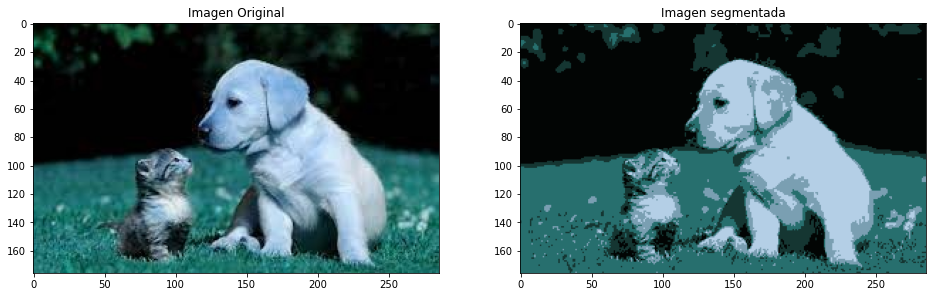

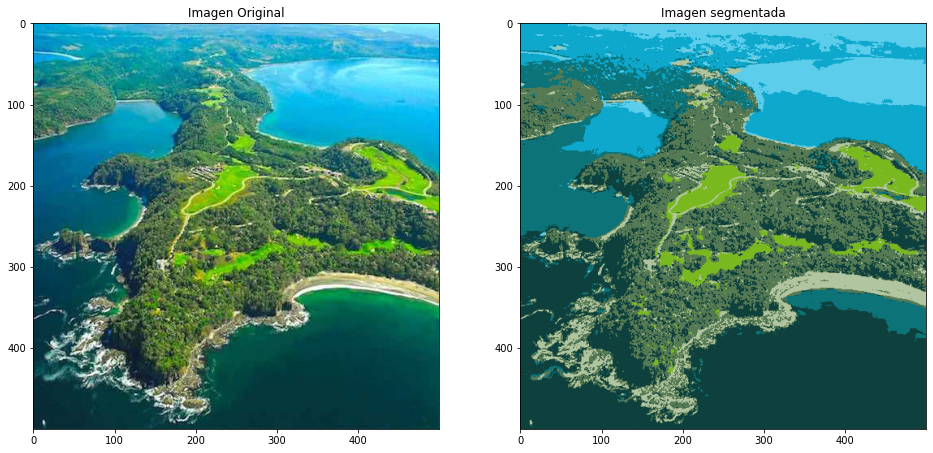

In [ ]:
clusterImage("imagen1.jpg", 5)
clusterImage("imagen2.jpg", 7)

---
# Parte 3 - Community Detection (25 pts) 

En la última parte de la tarea, se estudiará el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network". 

## Dataset

* Para esta parte de la tarea, trabajaremos con el dataset de grafos <b>"Enron email network"</b>, el cual contiene las interacciones vía correo electrónico de 36692 trabajadores y trabajadoras de la compañía energética estadounidense "Enron". 
* Este dataset se encuentra contenido en el archivo adjunto "Email-Enron.txt" en el cual se enumeran todos los pares de correos electrónicos de dicha empresa entre los cuales se ha enviado al menos un mensaje. 
* El archivo contiene 183831 líneas, las cuales corresponden al total de aristas no dirigidas del grafo y su formato por línea es:

<blockquote> #Nodo_origen \t #Nodo_destino. </blockquote>

## Community Detection

El problema de <b>Detección de Comunidades</b> es un problema fundamental en análisis de redes y consiste en buscar grupos de nodos que tengan ciertas propiedades en común y que, por tanto, sean más similares entre si que con otros nodos. A estos conjuntos de nodos les llamamos "comunidades". 

Si modelamos las interacciones de un conjunto de personas en un determinado contexto como un grafo, tendríamos que los nodos corresponderían a las personas y las aristas a las interacciones entre ellas. En este contexto, podemos definir a una comunidad como un subconjunto de nodos del grafo que están densamente conectados entre sí y débilmente conectados a los nodos en otras comunidades dentro del grafo. 

Para esto, podemos utilizar el algoritmo Louvain de Detección de comunidades para realizar Clustering en grafos, en el cual los clusters obtenidos corresponderán a las comunidades dentro del grafo. 


## Algoritmo Louvain 

Es un algoritmo para detección de comunidades en redes complejas o grafos, ideado en 2008 por investigadores de la Universidad Católica de Bélgica, cuyo objetivo es maximizar la modularidad de un grafo. 

¿Qué es la modularidad? Es una medida que compara la cantidad de aristas dentro y fuera de la comunidad, la cual está expresada por la siguiente ecuación para grafos con peso:  

\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

Donde:

* $A_{ij}$ es el peso de la arista entre $i$ y $j$
* $k_{i}$, $k_{j}$ son la suma de los pesos de las aristas conectadas a los nodos i y j respectivamente
* $m$ es la suma de todos los pesos de las aristas en el grafo
* $\delta$ es la función delta de Kronecker. La cual es 1 si $x = y$ y 0 en el caso contrario. 
* $Q \in [-1,1]$


Para optimizar la modularidad, el algoritmo realiza los siguientes pasos: 
1. Inicialmente, cada nodo constituye una comunidad. 
2. Luego, se selecciona un nodo al azar y se evalúa si la partición tiene mejor modularidad al asignar dicho nodo a la comunidad de alguno de sus vecinos. 
3. Si la modularidad de la partición actual es mejor, el nodo se queda en su comunidad. 
4. Si la modularidad de la partición al asignar el nodo a uno de sus vecinos es mejor, se asigna dicho nodo a la comunidad de dicho vecino. 
5. Se sigue seleccionando nodos al azar y realizando los pasos anteriores, hasta que las particiones obtenidas en dos pasos seguidos sean iguales. 


> Para esta implementación, se debe instalar la librería [Python-Louvain](https://github.com/taynaud/python-louvain) (<i>leer documentación y pasos de instalación</i>). Además, utilice la librería networkx para elaborar el grafo. 

In [ ]:
#Librerías
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Preguntas

1. Cargar el dataset en un grafo de networkx.
2. Aplicar el algoritmo Louvain para Clustering en el grafo. 
3. Generar un nuevo archivo "out.txt" con los nodos etiquetados. 
4. Mostrar gráficamente 5 comunidades. No importa si estas comunidades están conectadas las unas a las otras.  

In [ ]:
#Implementación
g = nx.read_edgelist("Email-Enron.txt",create_using=nx.Graph(), nodetype = int)
partition = community_louvain.best_partition(g)

fromTo = "{0} {1}\n"
arch = open("out.txt", "w")
for fromNode, label in partition.items():
  arch.write(fromTo.format(fromNode, label))
arch.close()

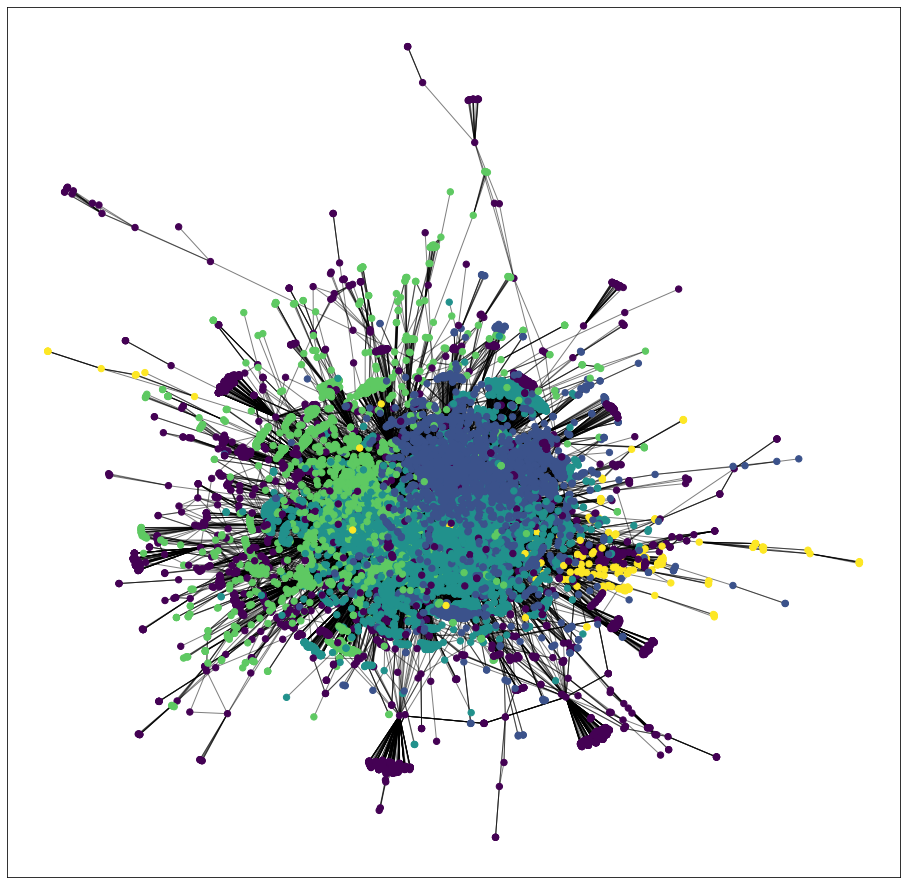

In [ ]:
#Implementación
g = nx.read_edgelist("Email-Enron.txt",create_using=nx.Graph(), nodetype = int)
partition = community_louvain.best_partition(g)
nodes_in_community5 = [node for node,community in partition.items() if community <= 4]
S = g.subgraph(nodes_in_community5)
fiveCommunities = dict((k, v) for k, v in partition.items() if v <= 4)

pos = nx.spring_layout(S)
plt.figure(figsize=(16,16))
cmap = cm.get_cmap('viridis', max(fiveCommunities.values()) + 1)
nx.draw_networkx_nodes(S, pos, fiveCommunities.keys(), node_size=40,
                       cmap=cmap, node_color=list(fiveCommunities.values()))
nx.draw_networkx_edges(S, pos, alpha=0.5)
plt.show()